# Assignment 2
In this assignment, we will go through Perceptron, Linear Classifiers, Loss Functions, Gradient Descent and Back Propagation.


PS. this one is not from Stanford's course.



\

## Instructions
* This notebook contain blocks of code, you are required to complete those blocks(where required)
* You are required to copy this notebook ("copy to drive" above) and complete the code.(DO NOT CHANGE THE NAME OF THE FUNCTIONS)

# Part 1: Perceptron
In this section, we will see how to implement a perceptron. Goal would be for you to delve into the mathematics.


## Intro
What's a perceptron? It's an algorithm modelled on biological computational model to classify things into binary classes. It's a supervides learning algorithm, meaning that you need to provide labelled data containing features and the actual classifications. A perceptron would take these features as input and spit out a binary value (0 or 1). While training the model with training data, we try to minimise the error and learn the parameters involved.

**How does it work?**\
A perceptron is modelled on a biological neuron. A neuron has input dendrites and the output is carried by axons. Similarly, a perceptron takes inputs called "features". After processing, a perceptron gives output. For computation, it has a "weight" vector which is multipled with feature vector. An activation function is added to introduce some non linearities and the output is given out.\
It can be represented as: $$  f=\sum_{i=1}^{m} w_ix_i +b$$

Let's implement this simple function to give an output.



In [6]:
import numpy as np

class perceptron():
    def __init__(self,num_input_features=8):
        self.weights = np.random.randn(num_input_features)
        self.bias = np.random.random()

    def activation(self,x):
      return np.heaviside(x,0.5)
    def forward(self,x: np.ndarray):
        '''
            you have random initialized weights and bias
            you can access then using `self.weights` and `self.bias`
            you should use activation function before returning
        
            x : input features
            return : a binary value as the output of the perceptron 
        '''
        # YOUR CODE HERE
        y=self.weights
        b=self.bias
        t=x.dot(y)
        v=t+b
        return np.heaviside(v,0.5)
        # YOUR CODE HERE

In [7]:
np.random.seed(0)
perc = perceptron(8)
assert perc.forward(np.arange(8))==1

# Part 2: Linear Classifier
In this section, we will see how to implement a linear Classifier.


## Intro


**How does it work?**

Linear Classifier uses the following function: $$Y = WX+b$$ Where, $W$ is a 2d array of weights with shape (#classes, #features).



Let's implement this classifier.



In [14]:
 import numpy as np

class LinearClassifier():
    def __init__(self,num_input_features=32,num_classes=5):
        self.weights = np.random.randn(num_input_features,num_classes)
        self.bias = np.random.rand(num_classes)

    def forward(self,x: np.ndarray):
        '''
            x: input features
            you have random initialized weights and bias
            you can access then using `self.weights` and `self.bias`
            return an output vector of num_classes size
        '''
        
        # YOUR CODE HERE
        ar=np.dot(x,self.weights)
        return ar+self.bias
        # YOUR CODE HERE

In [19]:
np.random.seed(0)
lc = LinearClassifier()
lc.forward(np.random.rand(1,32))
# Should be close to:
# array([[ 1.30208164,  5.58136003,  0.87793013, -4.7332119 ,  4.81172123]])

array([[ 1.30208164,  5.58136003,  0.87793013, -4.7332119 ,  4.81172123]])

# Part 3: Loss Functions, Gradient descent and Backpropagation




## Intro

Loss Functions tells how "off" the output od our model is. Based upon the application, you can use several different loss functions. Formally, A loss function is a function $L:(z,y)\in\mathbb{R}\times Y\longmapsto L(z,y)\in\mathbb{R}$ that takes as inputs the predicted value $z$ corresponding to the real data value yy and outputs how different they are We'll implement L1 loss, L2 loss, Logistic loss, hinge loss and cross entropy loss functions.

### **L1 loss**
L1 loss is the linear loss function  $L = \dfrac{1}{2}|y−z| $



In [20]:
import numpy as np
def L1Loss(z,y):
    '''
        y : True output.
        z : Predicted output.
        return : L
    '''
    L=(1/2)*abs(y-z)
    return L

### **L2 loss**
L2 loss is the quadratic loss function or the least square error function  $L = \dfrac{1}{2}(y−z)^2 $



In [21]:
import numpy as np
def L2Loss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
    L=(1/2)*abs(y-z)*abs(y-z)
    pass

### **Hinge Loss**
Hinge loss is: $ L = max( 0, 1 - yz ) $

In [25]:
import numpy as np
def hingeLoss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
  
    return max(0,1-y*z)

### **Cross Entropy Loss**
Another very famous loss function is Cross Entropy loss: $ L = −[ylog(z)+(1−y)log(1−z)] $.

In [26]:
import numpy as np
import math
def CELoss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
    return -(y*math.log(z) + (1-y)*math.log((1-z)))

### **0-1 Loss**
Loss Function used by perceptron is: $ \begin{cases} 
      0=z-y & z=y \\
      1=\dfrac{z-y}{z-y} & z\neq y
   \end{cases} $.

In [27]:
import numpy as np
def zeroOneLoss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
    if(np.array_equal(z,y)):
        return 1
    else:
        return 0

## Cost Function
The cost function $J$ is commonly used to assess the performance of a model, and is defined with the loss function $L$ as follows:
$$\boxed{J(\theta)=\frac{1}{m}\sum_{i=1}^mL(h_\theta(x^{(i)}), y^{(i)})}$$
where $h_\theta$ is the hypothesis function i.e. the function used to predict the output.

In [40]:
llossFunctions = {
    "l1" : L1Loss,
    "l2" : L2Loss,
    "hinge" : hingeLoss,
    "cross-entropy" : CELoss,
    "0-1" : zeroOneLoss
}

def cost(Z : np.ndarray, Y : np.ndarray, loss : str):
    '''
        Z : a numpy array of predictions.
        Y : a numpy array of true values.
        return : A numpy array of costs calculated for each example.
    '''
    loss_func = lossFunctions[loss]
    # YOUR CODE HERE
    J = np.sum(loss_func(Z , Y))

    # YOUR CODE HERE
    

## Gradient Descent and Back Propagation
Gradient Descent is an algorithm that minimizes the loss function by calculating it's gradient. By noting $\alpha\in\mathbb{R}$ the learning rate, the update rule for gradient descent is expressed with the learning rate $\alpha$ and the cost function $J$ as follows:

$$\boxed{ W \longleftarrow W -\alpha\nabla J( W )}$$
​


But we need to find the partial derivative of Loss function wrt every parameter to know what is the slight change that we need to apply to our parameters. This becomes particularly hard if we have more than 1 layer in our algorithm. Here's where **Back Propagation** comes in. It's a way to find gradients wrt every parameter using the chain rule. Backpropagation is a method to update the weights in the neural network by taking into account the actual output and the desired output. The derivative with respect to weight ww is computed using chain rule and is of the following form:

$$\boxed{\frac{\partial L(z,y)}{\partial w}=\frac{\partial L(z,y)}{\partial a}\times\frac{\partial a}{\partial z}\times\frac{\partial z}{\partial w}}$$
​
 
As a result, the weight is updated as follows:

$$\boxed{w\longleftarrow w-\alpha\frac{\partial L(z,y)}{\partial w}}$$

So, In a neural network, weights are updated as follows:

* Step 1: Take a batch of training data.
* Step 2: Perform forward propagation to obtain the corresponding loss.
* Step 3: Backpropagate the loss to get the gradients.
* Step 4: Use the gradients to update the weights of the network.
​

Bonus Problem
 
Now, Assuming that you know Back Propagation (read a bit about it, if you don't), we'll now implement an image classification model on CIFAR-10.

# **Bonus Problem**

Now, Assuming that you know Back Propagation (read a bit about it, if you don't), we'll now implement an image classification model on CIFAR-10.

In [41]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.8.0


In [42]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


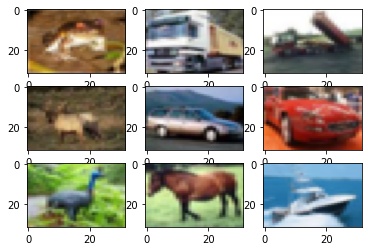

In [58]:
'''visualize data by plotting images'''
# YOUR CODE HERE
fig, a = plt.subplots(3, 3)
z= 0

for i in range(3):
    for j in range(3):
        a[i][j].imshow(x_train[z], aspect='auto')
        z=z+1

plt.show()
# YOUR CODE HERE

In [61]:
# number of classes
K = len(set(y_train))
'''
 calculate total number of classes
 for output layer
'''
print("number of classes:", K)
''' 
 Build the model using the functional API
 input layer
'''
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
 
'''Hidden layer'''
# YOUR CODE HERE
pass
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# YOUR CODE HERE
 
"""last hidden layer i.e.. output layer"""
# YOUR CODE HERE
pass
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
# YOUR CODE HERE
model.summary()
 


number of classes: 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                

In [71]:
# Compile
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam")


In [74]:
# Fit
history = model.fit(x_train, y_train, epochs=2)


Epoch 1/2
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2930
Epoch 2/2
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1764


Original label is truck and predicted label is truck


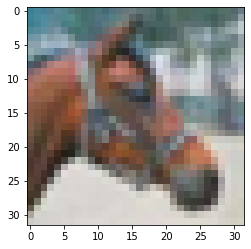

In [76]:
# label mapping
 
# label mapping
 
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 17
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))